In [69]:
get_ipython().magic(u'run visualizations.ipynb')
import sys
import hits
from memory_profiler import memory_usage
from collections import Counter
from pprint import pprint
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


# Get the data

In [70]:
data_file = "/vols/comet/users/elg112/ICEDUST"\
            "/local_storage/MC3b_tree"\
            "/loose_timing_cut/event_root"\
            "/1_2500_merged_cdc_sum_hit.root"

In [71]:
data_file = "/vols/comet/users/elg112/ICEDUST"\
            "/local_storage/SimDetectorResponse_tree"\
            "/new_sdetresp_analy/10k_signal_with_momentum_analysis.root"

In [72]:
data_file = "/vols/comet/users/elg112/ICEDUST"\
            "/local_storage/SimDetectorResponse_tree"\
            "/production_output/signal/00000009_cdc_sum_sig.root"

In [73]:
data_file = "/vols/comet/users/elg112/ICEDUST"\
            "/local_storage/SimDetectorResponse_tree"\
            "/production_output/signal/10k_merged_cdc_sum_hit.root"

In [74]:
data_file = "/vols/comet/users/elg112/ICEDUST/local_storage/MC3b_Signal/output/0006/1k_merged_from_imperial.root"

In [75]:
data_file= "/vols/comet/users/elg112/ICEDUST/local_storage/Blessed_Outputs/2016-06-15_EwenG_1_2495_cdc_back.root"

In [76]:
data_file= "/vols/comet/users/elg112/ICEDUST/local_storage/Blessed_Outputs/335e4_cdc_signal.root"

In [77]:
data_file= "/vols/comet/users/elg112/ICEDUST/local_storage/Blessed_Outputs/2e5_cdc_signal.root"

In [78]:
data_file= "/vols/comet/users/elg112/ICEDUST/local_storage/Blessed_Outputs/scratch/icl_some_events.root"

In [79]:
data_file="/vols/comet/users/elg112/ICEDUST/local_storage/Blessed_Outputs/test_10_events.root"

In [50]:
data_file="/vols/comet/users/elg112/ICEDUST/local_storage/Blessed_Outputs/test_sig_xt_curve.root"

In [51]:
reload(hits)
from hits import CyDetHits

In [52]:
from root_numpy import root2array, list_branches

In [53]:
all_branches = list()
for branch in list_branches(data_file, treename="COMETEventsSummary"):
    if branch not in ['CDCHit.fTrack.fTrackID', 
                      'CDCHit.fDetectedTime', 
                      'CDCHit.fCharge', 
                      'CDCHit.fEventNumber']:
        all_branches.append(branch)

In [54]:
print memory_usage()

[291.06640625]


In [55]:
ice_cydet = CyDetHits(branches=all_branches,
                     path=data_file, 
                     tree="COMETEventsSummary", 
                     prefix="CDCHit.f",
                     hit_type_name="Track.fTrackID",
                     signal_coding=[1],
                     use_evt_idx=True)

In [56]:
ice_cydet.print_branches()

Branches available are:
CDCHit.fDriftDist
CDCHit.fDriftTime
CDCHit.fTurnID
CDCHit.fMCMom.fX
CDCHit.fMCMom.fY
CDCHit.fMCMom.fZ
CDCHit.fTrack.fParentTrackID
CDCHit.fTrack.fPID
CDCHit.fTrack.fTags.fTagMaskPersisted
CDCHit.fTrack.fTagsAsParent.fTagMaskPersisted
CDCHit.fTrack.fTagsAsDaughter.fTagMaskPersisted
CDCHit.fTrack.fStartMomentum.fX
CDCHit.fTrack.fStartMomentum.fY
CDCHit.fTrack.fStartMomentum.fZ
CDCHit.fTrack.fStopMomentum.fX
CDCHit.fTrack.fStopMomentum.fY
CDCHit.fTrack.fStopMomentum.fZ
CDCHit.fTrack.fStartPosGlobal.fP.fX
CDCHit.fTrack.fStartPosGlobal.fP.fY
CDCHit.fTrack.fStartPosGlobal.fP.fZ
CDCHit.fTrack.fStartPosGlobal.fE
CDCHit.fTrack.fStopPosGlobal.fP.fX
CDCHit.fTrack.fStopPosGlobal.fP.fY
CDCHit.fTrack.fStopPosGlobal.fP.fZ
CDCHit.fTrack.fStopPosGlobal.fE
CDCHit.fMCPos.fP.fX
CDCHit.fMCPos.fP.fY
CDCHit.fMCPos.fP.fZ
CDCHit.fMCPos.fE
CDCHit.fChannel
CDCHit.fHitNumber
CDCHit.fTrack.fTrackID
CDCHit.fEventNumber
CDCHit.fhits_index
CDCHit.fevent_index
CDCHit.fTrigTime
CDCHit.fvol_id
CD

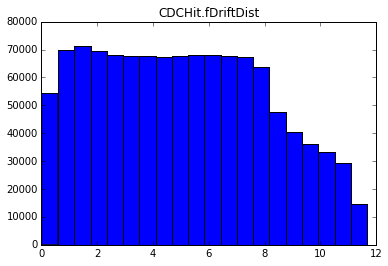

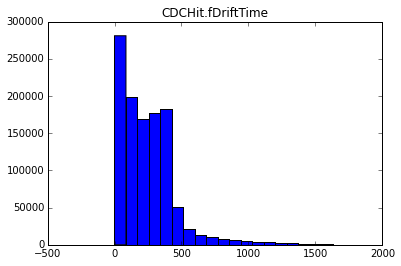

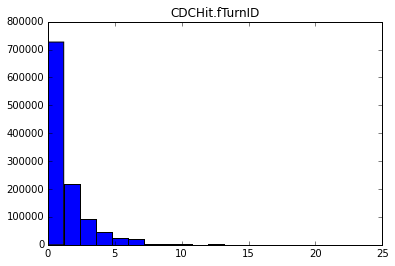

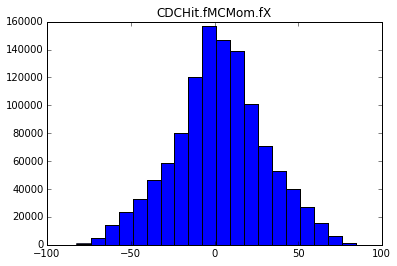

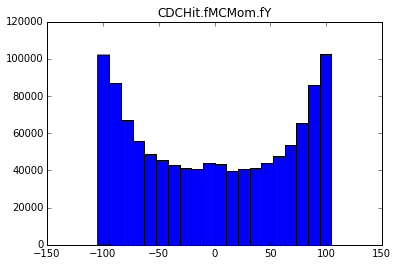

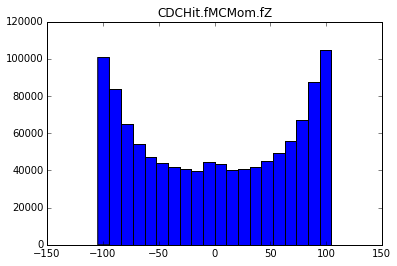

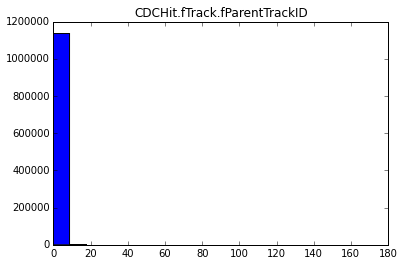

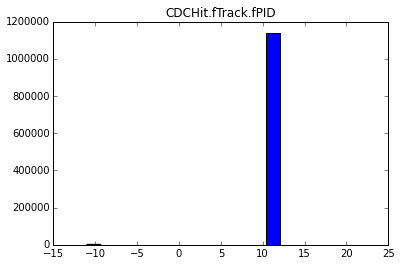

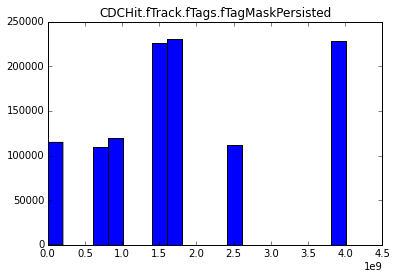

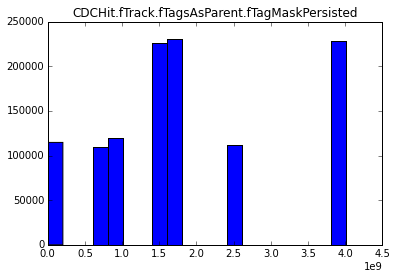

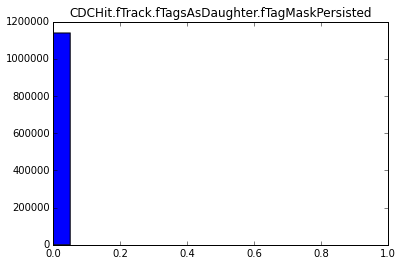

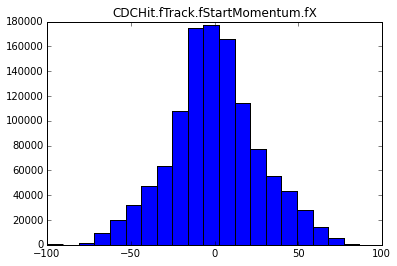

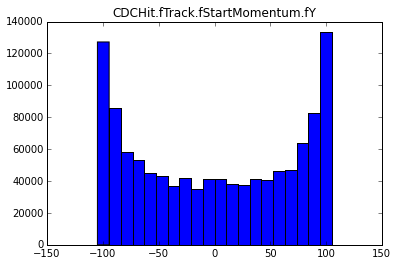

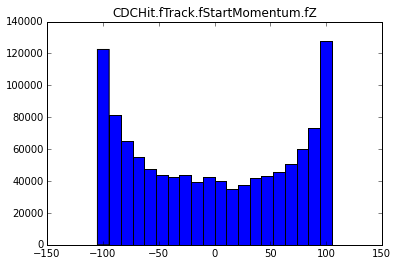

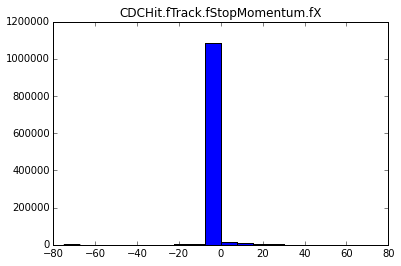

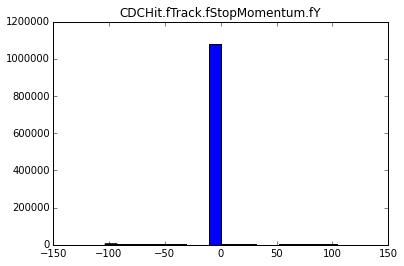

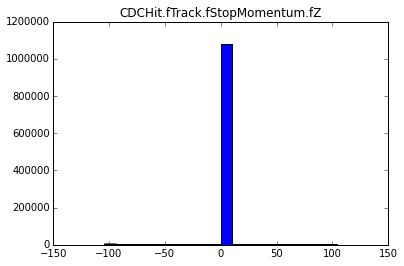

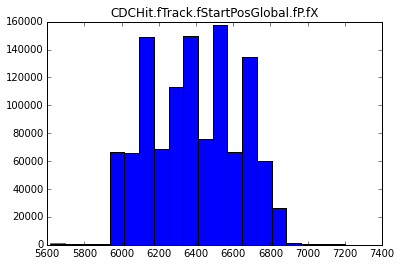

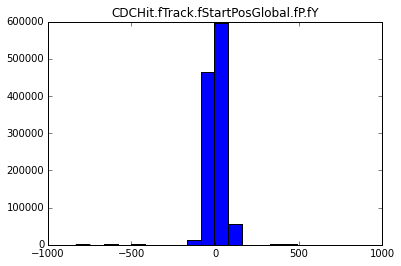

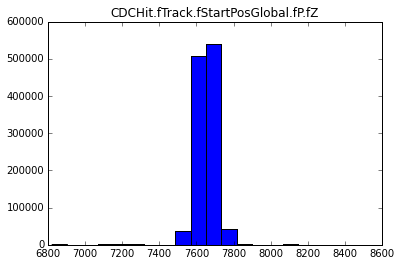

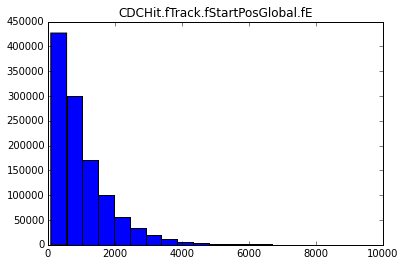

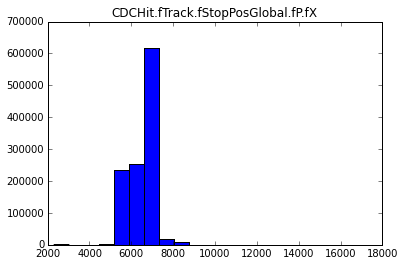

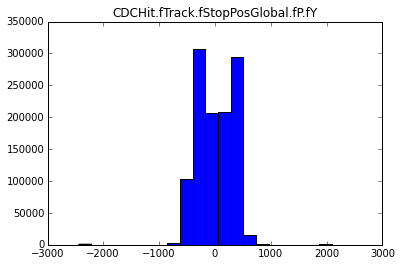

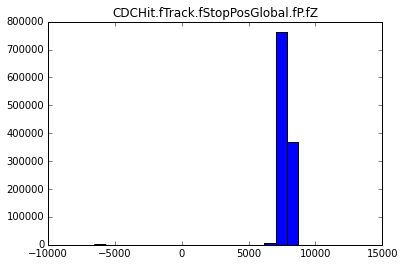

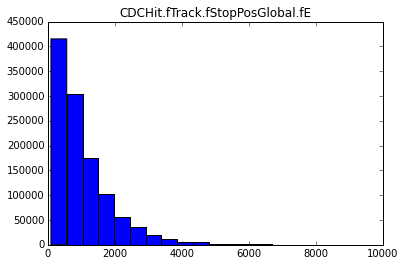

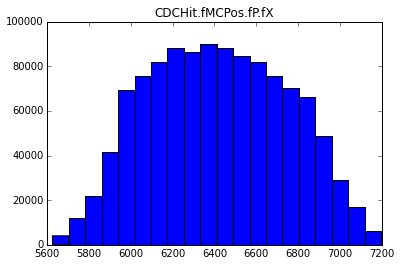

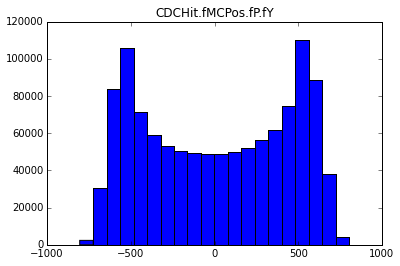

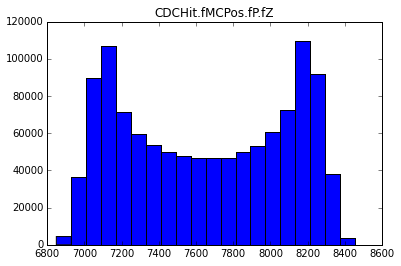

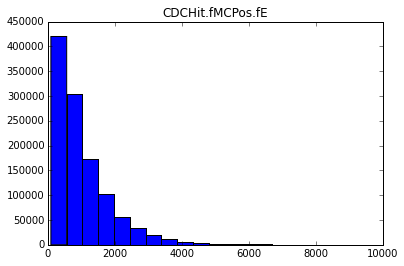

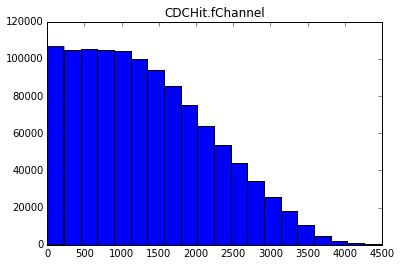

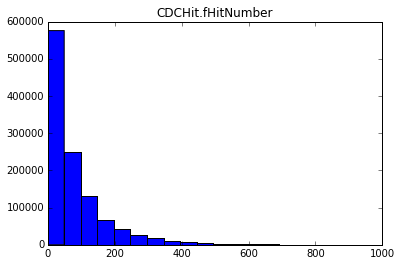

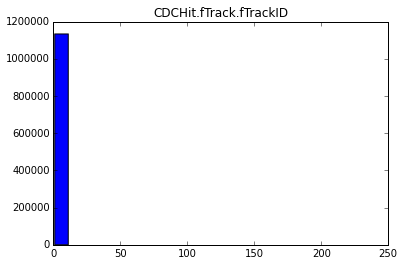

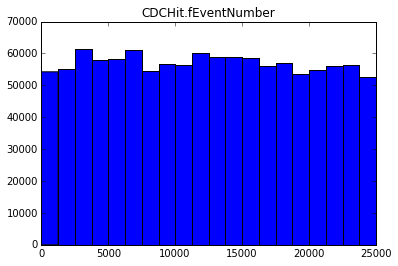

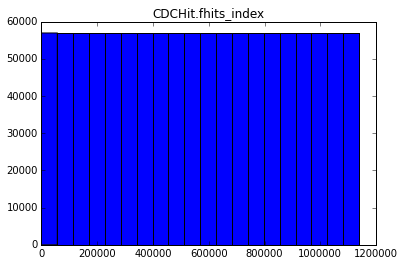

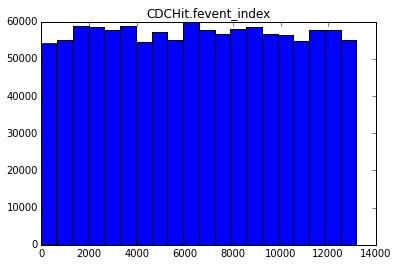

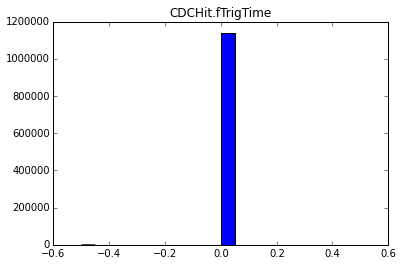

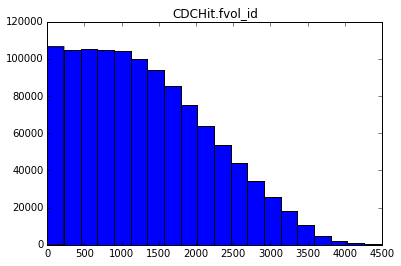

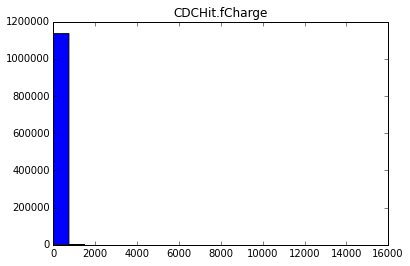

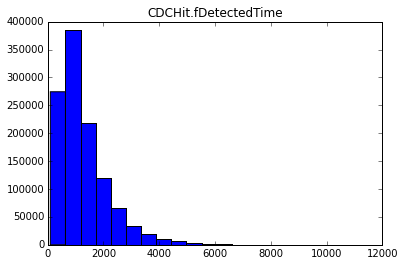

In [57]:
for branch in ice_cydet.data.dtype.names:
    plt.title(branch)
    plt.hist(ice_cydet.data[branch], bins=20)
    plt.show()

In [58]:
# 00000001_cdc 44580 entries
# 00000002_cdc 48427 entries
# 2k_cdc       93007 entries

In [59]:
print 44580 + 48427

93007


In [62]:
old_index = None
for event in range(ice_cydet.n_events):
    event_indexes = np.unique(ice_cydet.get_events(event)["CDCHit.fEventNumber"])
    if len(event_indexes) != 1:
        print event, event_indexes
    else: 
        index_here = event_indexes[0]
        if index_here < old_index:
            print event, old_index, index_here      
        old_index = index_here

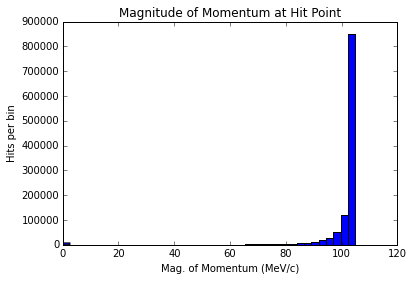

In [63]:
plt.title("Magnitude of Momentum at Hit Point")
plt.xlabel("Mag. of Momentum (MeV/c)")
plt.ylabel("Hits per bin")
plt.hist(np.sqrt(
             np.square(ice_cydet.data["CDCHit.fMCMom.fX"]) +\
             np.square(ice_cydet.data["CDCHit.fMCMom.fY"]) +\
             np.square(ice_cydet.data["CDCHit.fMCMom.fZ"])),
         bins=40)
plt.show()

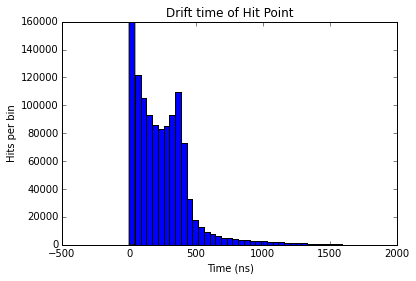

In [64]:
plt.title("Drift time of Hit Point")
plt.xlabel("Time (ns)")
plt.ylabel("Hits per bin")
plt.hist(ice_cydet.data["CDCHit.fDriftTime"],
         bins=40)
plt.show()

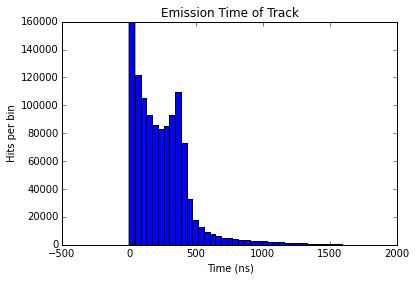

In [65]:
plt.title("Emission Time of Track")
plt.xlabel("Time (ns)")
plt.ylabel("Hits per bin")
plt.hist(ice_cydet.data["CDCHit.fDriftTime"],
         bins=40)
plt.show()

# Visualise the data

[472]


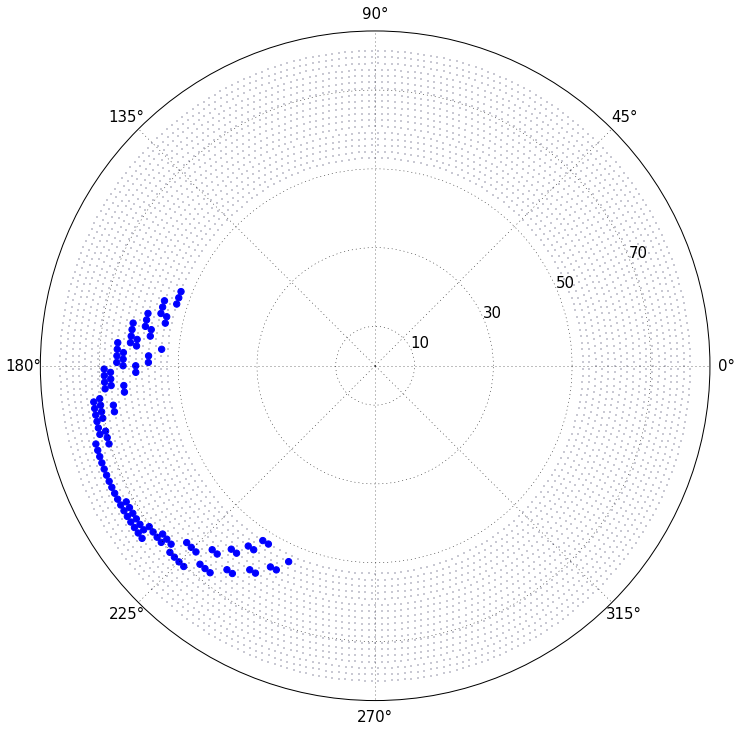

[473]


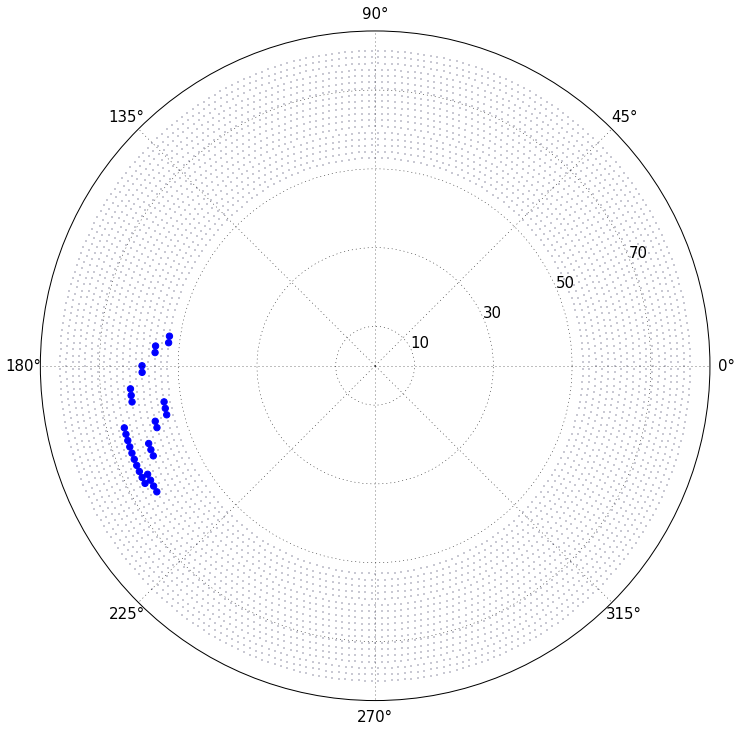

[474]


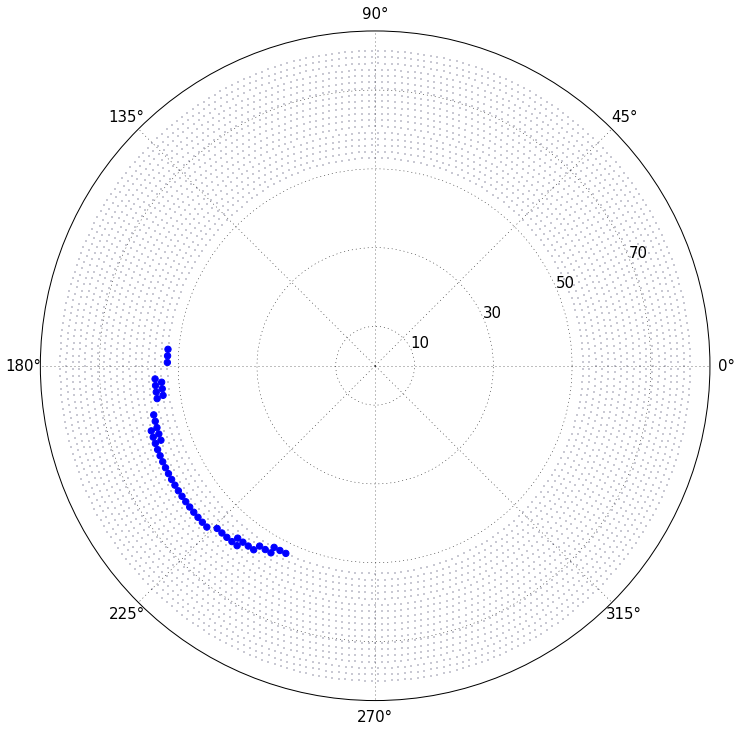

[475]


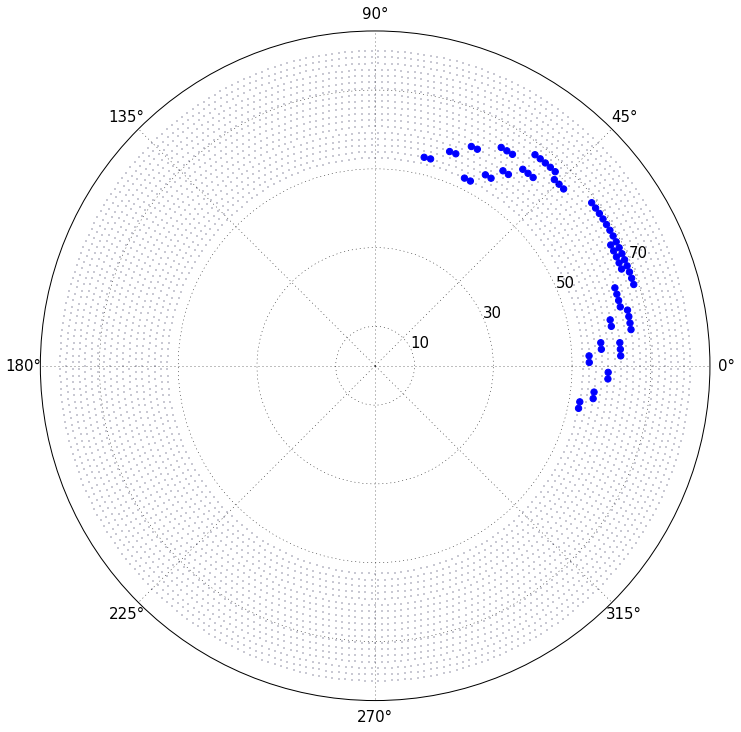

[478]


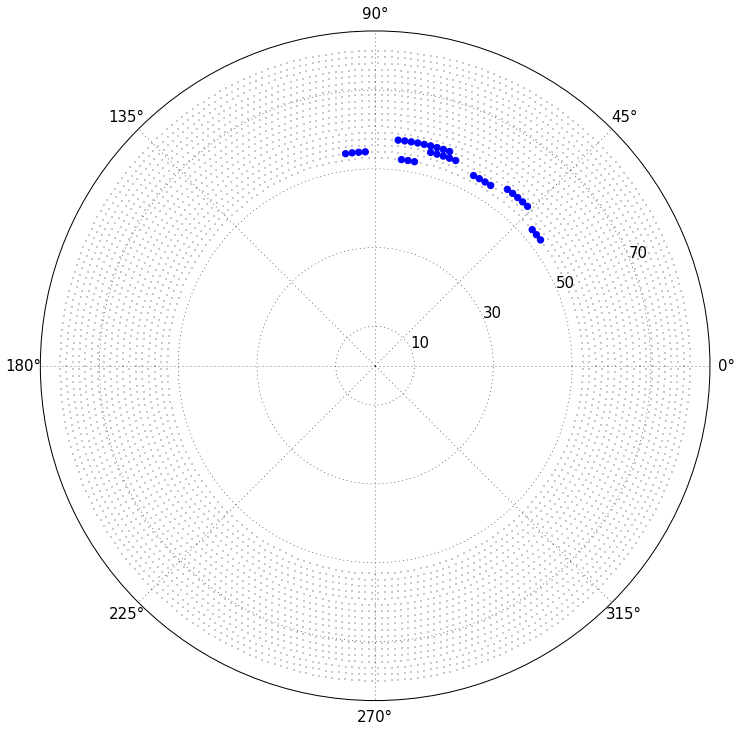

[482]


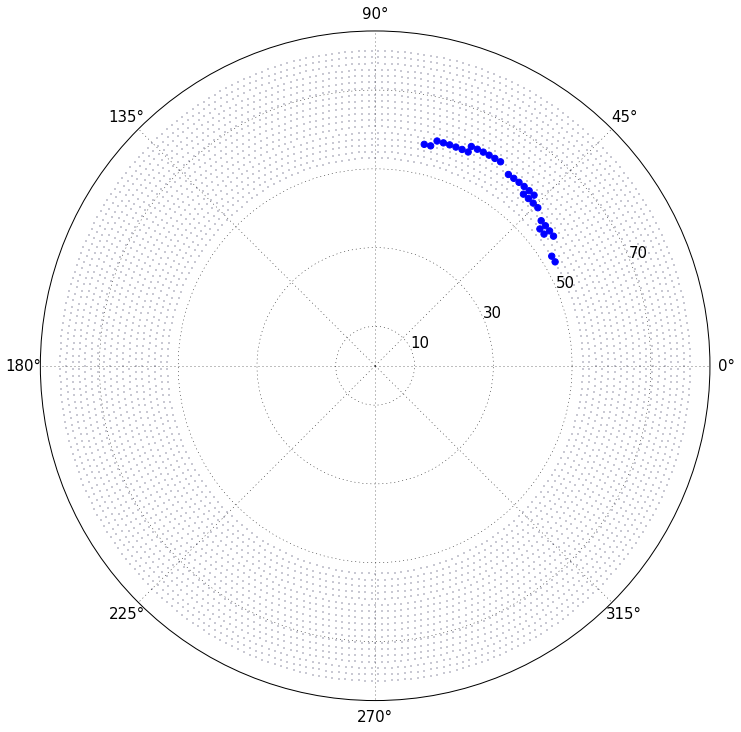

[485]


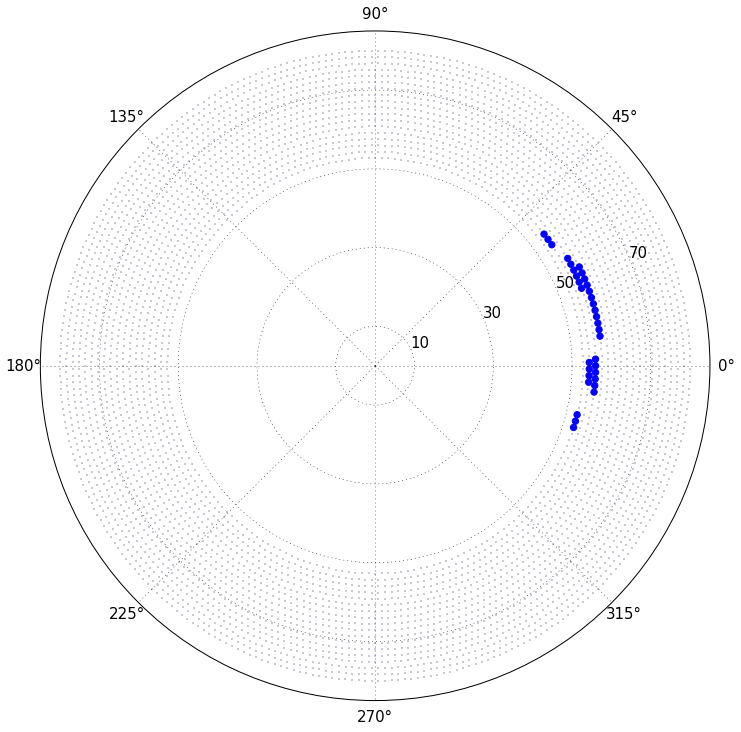

[486]


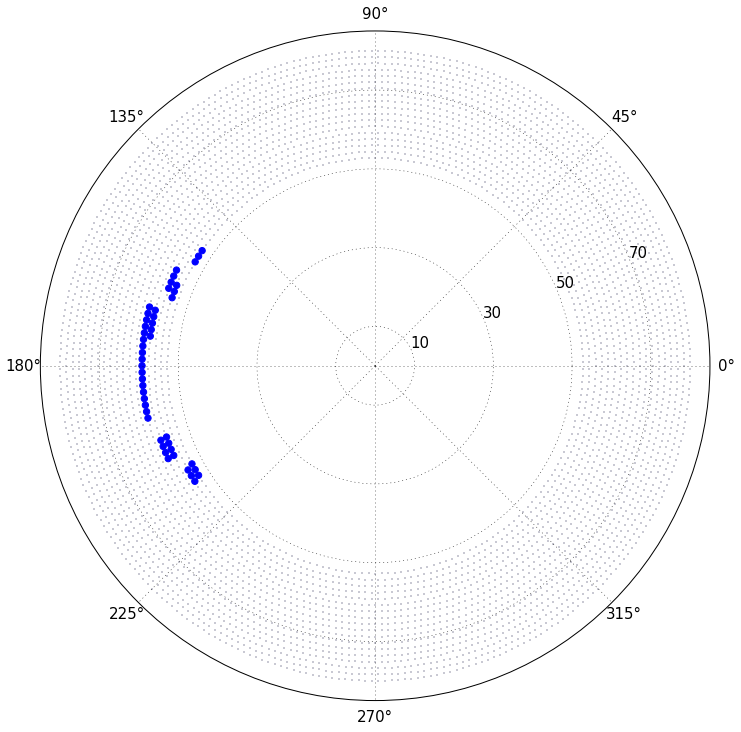

[487]


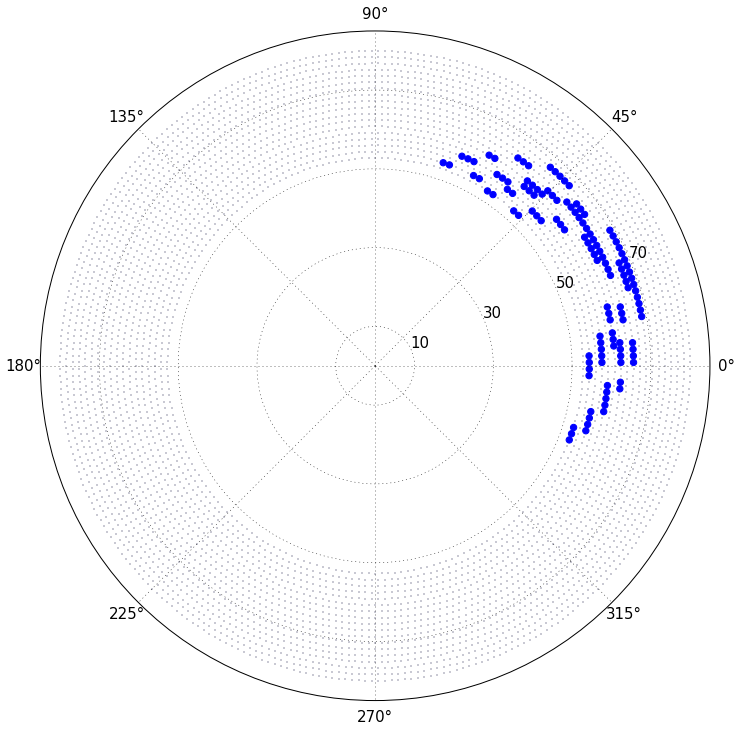

[489]


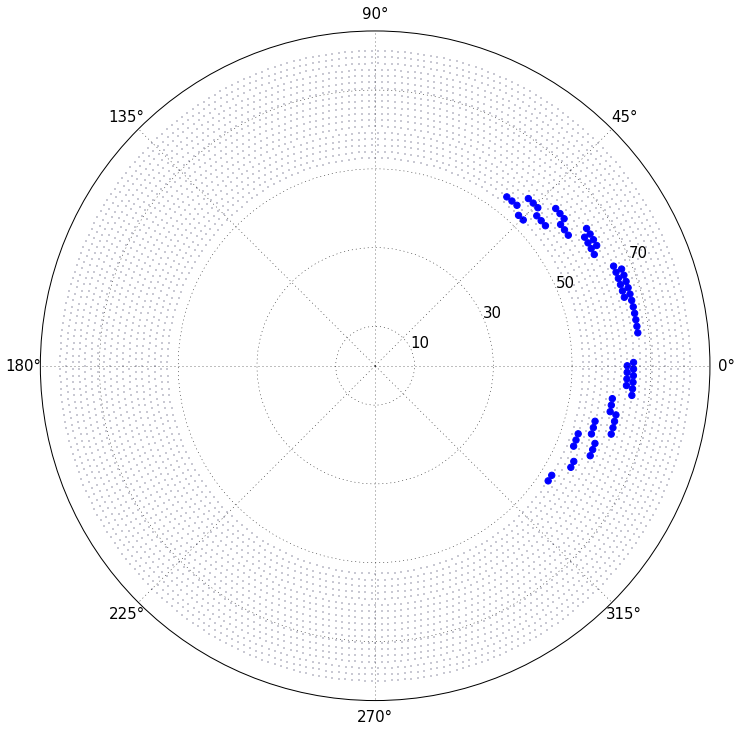

In [68]:
for event in np.unique(ice_cydet.hits_to_events)[245:255]:
    plot_output(ice_cydet.get_hit_types(event), ice_cydet.geom)
    print np.unique(ice_cydet.get_events(event)["CDCHit.fEventNumber"])
    show()